<div style="
    padding: 20px;
    color: white;
    margin: 0;
    font-size: 300%;
    font-weight: 800;
    text-align: center;
    display: fill;
    border-radius: 60px;
    background-color: #D8CEF6;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);
    text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);
">
    Panic Attack Dataset <br>
    (EDA / ML, DL)
</div>

# **<div style="display: inline-block; border: 5px solid blue; padding: 15px 10px; border-radius: 5px; font-size: 35px;"> Project. Panic Attack Dataset (Classification)</div>**


## Goal
> ## EDA : Column Analysis
> ## Modeling : Predicting Panic_Score

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Import Libraries & Read Dataset</div>

In [1]:
# For EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, RobustScaler
from imblearn.over_sampling import SMOTE
import warnings

warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
warnings.filterwarnings("ignore", category=UserWarning, module="IPython.core.pylabtools")

# For Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, BayesianRidge
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.exceptions import FitFailedWarning

# For Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [2]:
df = pd.read_csv('/kaggle/input/panic-attack-dataset/panic_attack_dataset.csv')
df.head()

,ID,Age,Gender,Panic_Attack_Frequency,Duration_Minutes,Trigger,Heart_Rate,Sweating,Shortness_of_Breath,Dizziness,...,Trembling,Medical_History,Medication,Caffeine_Intake,Exercise_Frequency,Sleep_Hours,Alcohol_Consumption,Smoking,Therapy,Panic_Score
0,1,56,Female,9,5,Caffeine,134,Yes,No,Yes,...,No,Anxiety,No,2,3,6.4,5,Yes,Yes,5
1,2,46,Male,8,9,Stress,139,Yes,Yes,No,...,No,PTSD,Yes,2,5,5.0,3,No,Yes,7
2,3,32,Female,6,31,PTSD,141,No,Yes,Yes,...,No,Depression,No,4,0,8.3,8,No,Yes,7
3,4,60,Male,5,20,Caffeine,109,Yes,Yes,No,...,Yes,Depression,No,3,3,5.3,8,No,No,1
4,5,25,Non-binary,6,10,Caffeine,101,Yes,No,Yes,...,Yes,Depression,No,3,6,7.2,2,No,No,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      1200 non-null   int64  
 1   Age                     1200 non-null   int64  
 2   Gender                  1200 non-null   object 
 3   Panic_Attack_Frequency  1200 non-null   int64  
 4   Duration_Minutes        1200 non-null   int64  
 5   Trigger                 1200 non-null   object 
 6   Heart_Rate              1200 non-null   int64  
 7   Sweating                1200 non-null   object 
 8   Shortness_of_Breath     1200 non-null   object 
 9   Dizziness               1200 non-null   object 
 10  Chest_Pain              1200 non-null   object 
 11  Trembling               1200 non-null   object 
 12  Medical_History         1078 non-null   object 
 13  Medication              1200 non-null   object 
 14  Caffeine_Intake         1200 non-null   

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1200.0,600.500000,346.554469,1.0,300.75,600.5,900.25,1200.0
Age,1200.0,41.134167,13.543412,18.0,29.00,42.0,53.00,64.0
Panic_Attack_Frequency,1200.0,4.412500,2.847648,0.0,2.00,4.0,7.00,9.0
Duration_Minutes,1200.0,24.392500,11.399930,5.0,15.00,24.0,34.00,44.0
Heart_Rate,1200.0,120.302500,23.369912,80.0,100.00,121.0,141.00,159.0
Caffeine_Intake,1200.0,2.539167,1.716854,0.0,1.00,3.0,4.00,5.0
Exercise_Frequency,1200.0,2.955000,2.061516,0.0,1.00,3.0,5.00,6.0
Sleep_Hours,1200.0,6.481583,1.405625,4.0,5.30,6.5,7.60,9.0
Alcohol_Consumption,1200.0,4.416667,2.902598,0.0,2.00,4.0,7.00,9.0
Panic_Score,1200.0,5.569167,2.793155,1.0,3.00,6.0,8.00,10.0


In [5]:
df.describe(include='object').T

,count,unique,top,freq
Gender,1200,3,Female,549
Trigger,1200,6,Unknown,206
Sweating,1200,2,Yes,836
Shortness_of_Breath,1200,2,Yes,746
Dizziness,1200,2,Yes,620
Chest_Pain,1200,2,No,713
Trembling,1200,2,No,610
Medical_History,1078,3,Anxiety,492
Medication,1200,2,No,700
Smoking,1200,2,No,875


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Data preprocessing</div>

In [6]:
df.drop('ID', axis=1, inplace=True)

print("Missing Value (%)")
missing_values = df.isna().mean() * 100
print(missing_values)

print("\nDuplicate Rows (%):")
duplicate_count = df.duplicated().mean()
print(duplicate_count)

Missing Value (%)
Age                        0.000000
Gender                     0.000000
Panic_Attack_Frequency     0.000000
Duration_Minutes           0.000000
Trigger                    0.000000
Heart_Rate                 0.000000
Sweating                   0.000000
Shortness_of_Breath        0.000000
Dizziness                  0.000000
Chest_Pain                 0.000000
Trembling                  0.000000
Medical_History           10.166667
Medication                 0.000000
Caffeine_Intake            0.000000
Exercise_Frequency         0.000000
Sleep_Hours                0.000000
Alcohol_Consumption        0.000000
Smoking                    0.000000
Therapy                    0.000000
Panic_Score                0.000000
dtype: float64

Duplicate Rows (%):
0.0


In [7]:
df['Medical_History'].unique()

array(['Anxiety', 'PTSD', 'Depression', nan], dtype=object)

In [8]:
df['Medical_History'] = df['Medical_History'].fillna('nan')
df['Medical_History'].unique()

array(['Anxiety', 'PTSD', 'Depression', 'nan'], dtype=object)

In [9]:
def outlier_check(row, colname):  
    Q1 = row[colname].quantile(0.25)
    Q3 = row[colname].quantile(0.75)
    IQR = Q3 - Q1
    lower_b = Q1 - 1.5 * IQR
    upper_b = Q3 + 1.5 * IQR
    outlier = row.loc[(row[colname] < lower_b) | (row[colname] > upper_b)]
    return outlier
    
outliers = pd.DataFrame() 

for col in df.select_dtypes(include=['number']).columns: 
    outliers_in_col = outlier_check(df, col) 
    outliers = pd.concat([outliers, outliers_in_col])

outliers.reset_index(drop=True, inplace=True)

total_rows = len(df)
outlier_count = len(outliers)
outlier_ratio = (outlier_count / total_rows) * 100

if outliers.empty:
    print("No outliers")
else:
    print(f"Number of Outliers: {outlier_count}")
    print(f"Outlier Ratio: {outlier_ratio:.2f}%")

No outliers


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">EDA : Data Distribution</div>

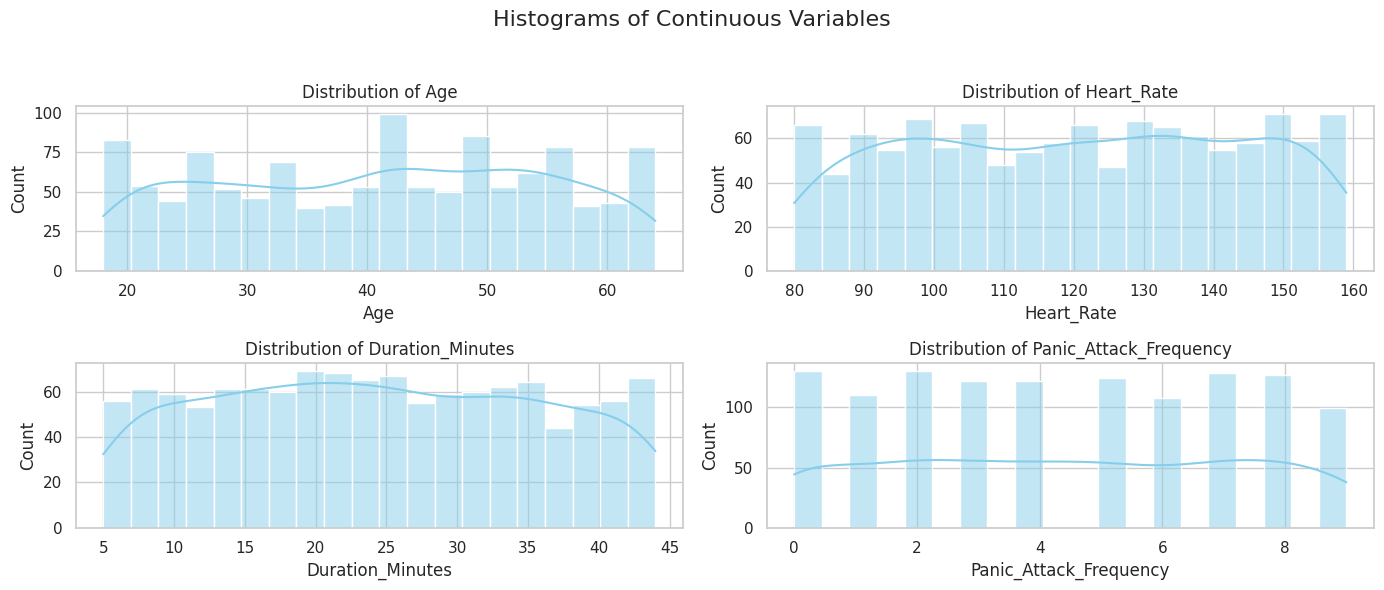

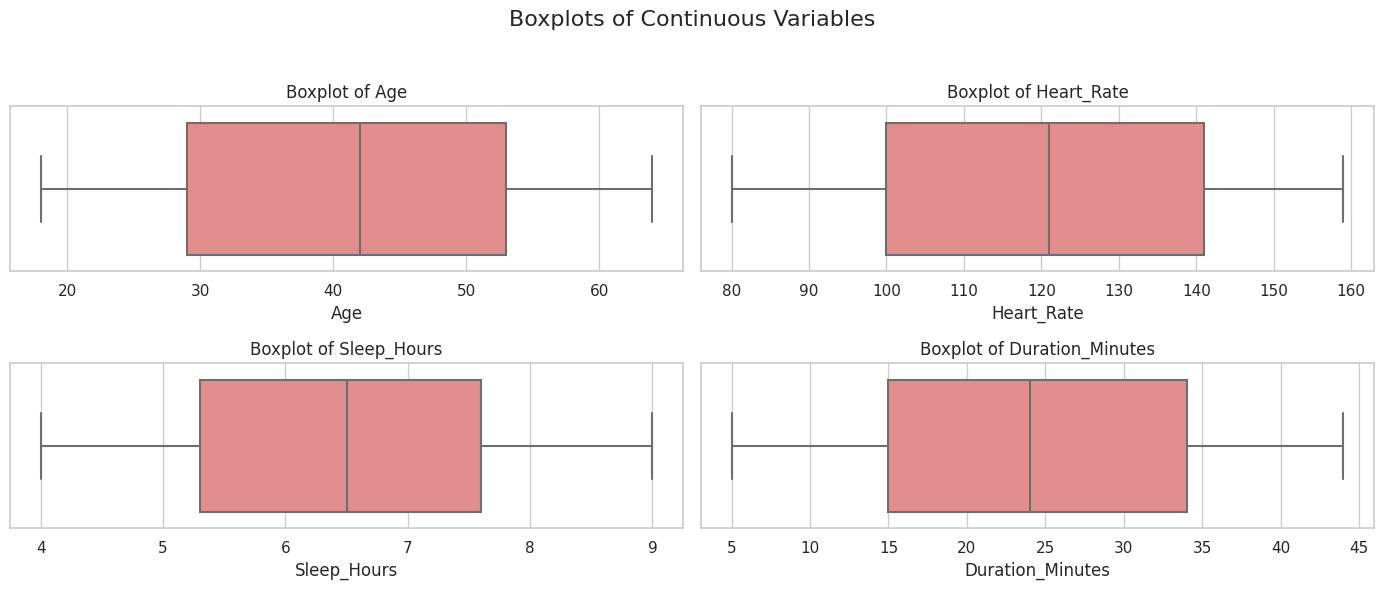

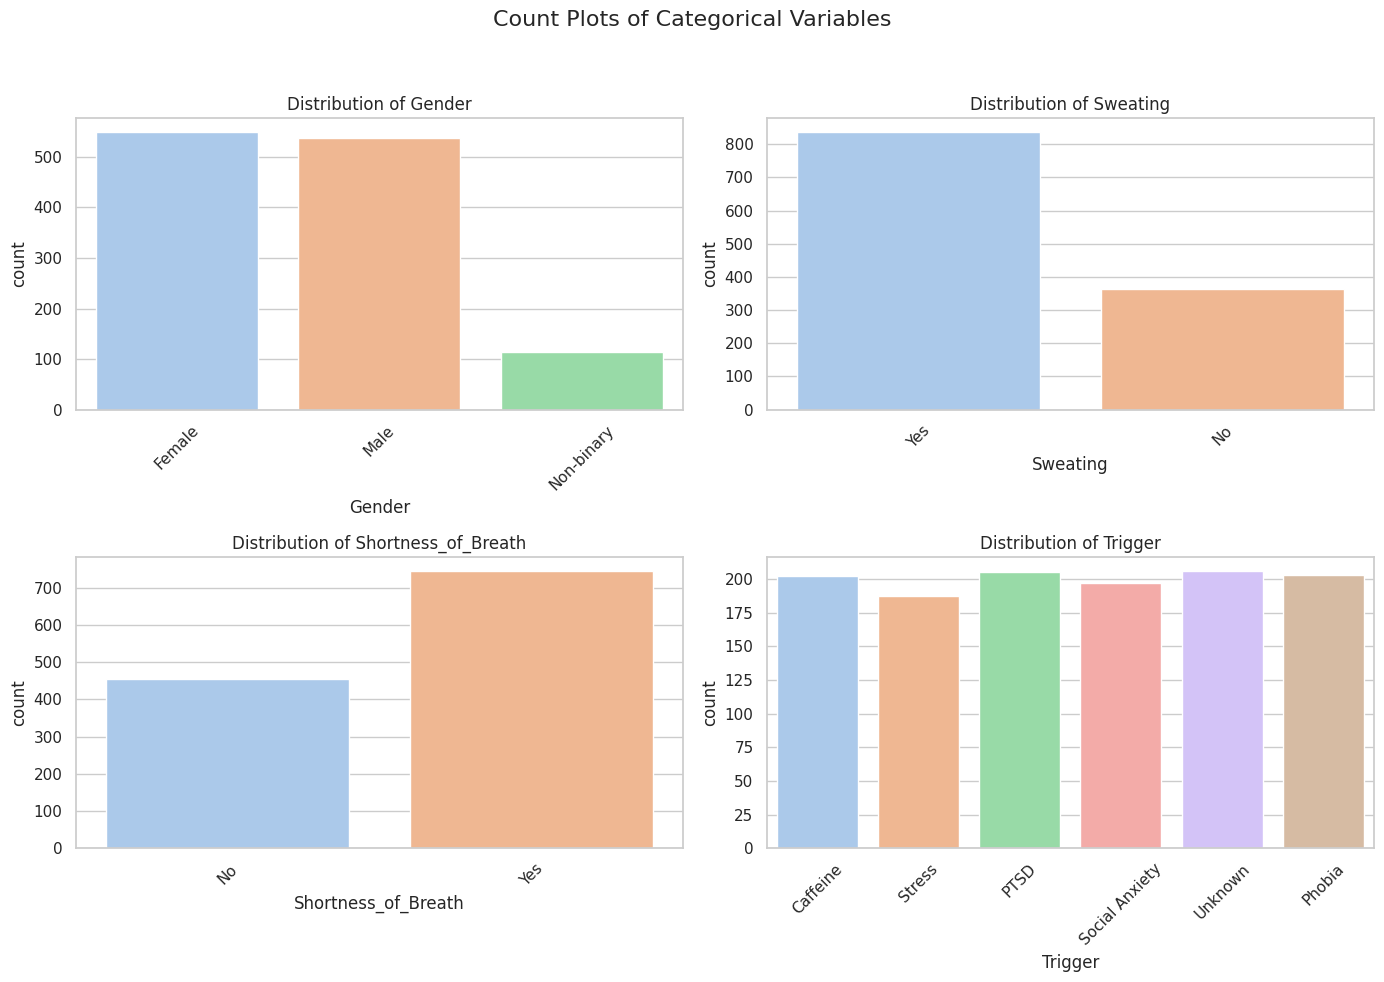

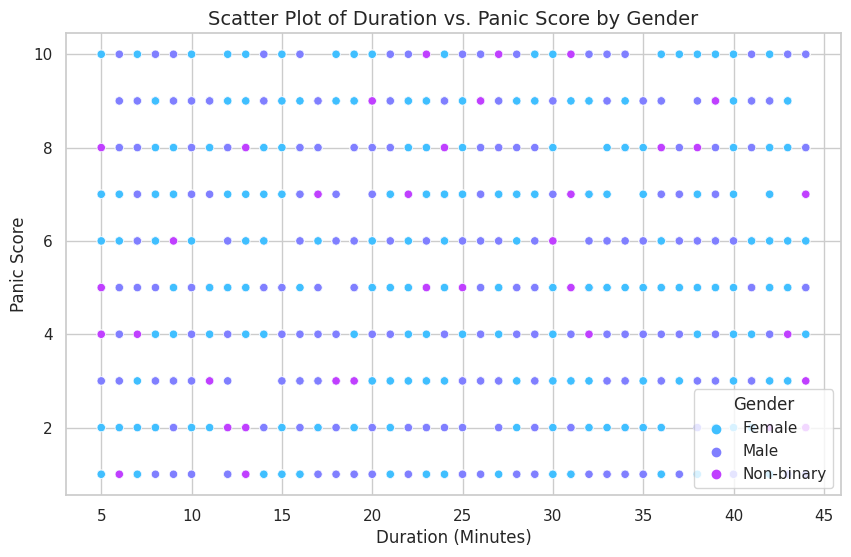

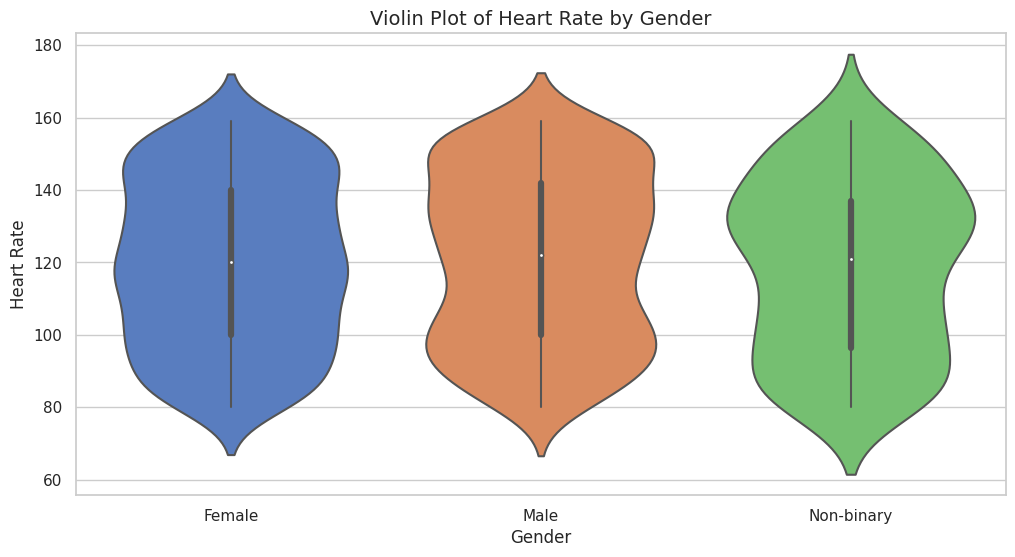

In [10]:
sns.set(style='whitegrid')

# 1. Histogram for continuous variables
plt.figure(figsize=(14, 6))
plt.suptitle("Histograms of Continuous Variables", fontsize=16)
for i, col in enumerate(['Age', 'Heart_Rate', 'Duration_Minutes', 'Panic_Attack_Frequency']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], bins=20, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 2. Boxplots for continuous variables
plt.figure(figsize=(14, 6))
plt.suptitle("Boxplots of Continuous Variables", fontsize=16)
for i, col in enumerate(['Age', 'Heart_Rate', 'Sleep_Hours', 'Duration_Minutes']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 3. Count plots for categorical variables
plt.figure(figsize=(14, 10))
plt.suptitle("Count Plots of Categorical Variables", fontsize=16)
for i, col in enumerate(['Gender', 'Sweating', 'Shortness_of_Breath', 'Trigger']):
    plt.subplot(2, 2, i + 1)
    sns.countplot(data=df, x=col, palette='pastel')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 4. Scatter plot for relationships
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration_Minutes', y='Panic_Score', hue='Gender', data=df, palette='cool')
plt.title("Scatter Plot of Duration vs. Panic Score by Gender", fontsize=14)
plt.xlabel("Duration (Minutes)")
plt.ylabel("Panic Score")
plt.legend(title="Gender")
plt.show()

# 5. Violin plots for categorical and numerical combinations
plt.figure(figsize=(12, 6))
sns.violinplot(x='Gender', y='Heart_Rate', data=df, palette='muted')
plt.title("Violin Plot of Heart Rate by Gender", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Heart Rate")
plt.show()

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">EDA : Correlation Analysis</div>

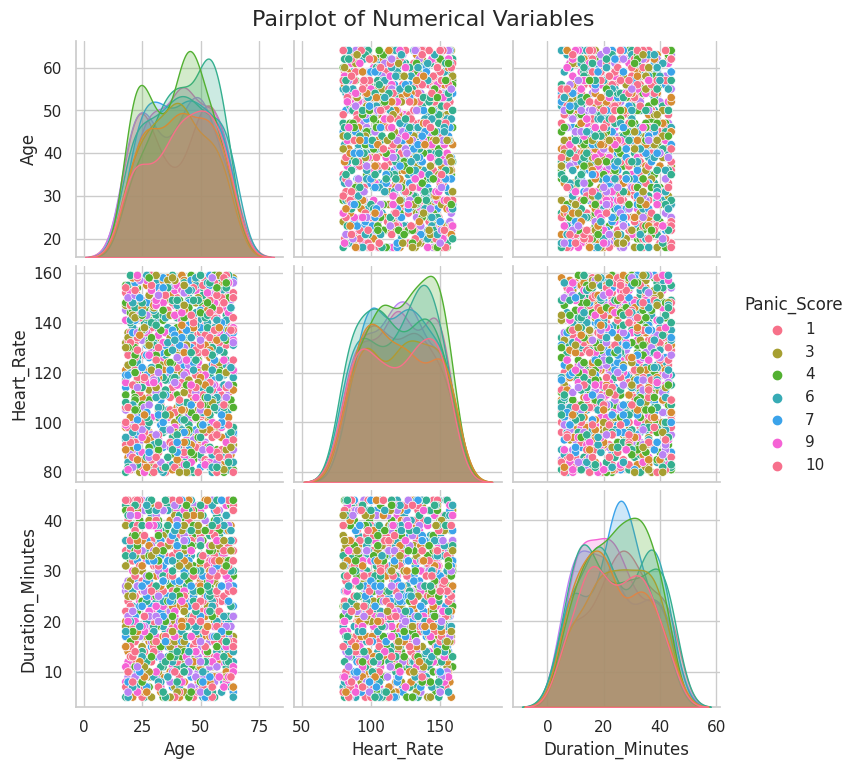

In [11]:
sns.pairplot(df[['Age', 'Heart_Rate', 'Duration_Minutes', 'Panic_Score']], diag_kind='kde', palette='husl', hue = 'Panic_Score')
plt.suptitle("Pairplot of Numerical Variables", y=1.02, fontsize=16)
plt.show()

In [12]:
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:  
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

num_columns = df.select_dtypes(include=['int64', 'float64']).columns

num_columns_to_scale = [col for col in num_columns if col != 'Panic_Score']

scaler = StandardScaler()
df[num_columns_to_scale] = scaler.fit_transform(df[num_columns_to_scale])

print("Scaled Numerical Data (excluding Panic_Score):")
df[num_columns_to_scale].head()

Scaled Numerical Data (excluding Panic_Score):


,Age,Gender,Panic_Attack_Frequency,Duration_Minutes,Trigger,Heart_Rate,Sweating,Shortness_of_Breath,Dizziness,Chest_Pain,Trembling,Medical_History,Medication,Caffeine_Intake,Exercise_Frequency,Sleep_Hours,Alcohol_Consumption,Smoking,Therapy
0,1.098101,-0.982406,1.611650,-1.701816,-1.447557,0.586361,0.659854,-1.281863,0.967204,1.209986,-0.983470,-0.983929,-0.845154,-0.314174,0.021838,-0.058065,0.201053,1.640825,0.991701
1,0.359427,0.558623,1.260337,-1.350791,0.884079,0.800401,0.659854,0.780115,-1.033908,-0.826456,-0.983470,1.002135,1.183216,-0.314174,0.992402,-1.054478,-0.488272,-0.609449,0.991701
2,-0.674717,-0.982406,0.557710,0.579850,-0.864648,0.886017,-1.515488,0.780115,0.967204,-0.826456,-0.983470,0.009103,-0.845154,0.851233,-1.434008,1.294210,1.235041,-0.609449,0.991701
3,1.393570,0.558623,0.206397,-0.385470,-1.447557,-0.483836,0.659854,0.780115,-1.033908,-0.826456,1.016808,0.009103,-0.845154,0.268529,0.021838,-0.840961,1.235041,-0.609449,-1.008368
4,-1.191789,2.099651,0.557710,-1.263034,-1.447557,-0.826300,0.659854,-1.281863,0.967204,1.209986,1.016808,0.009103,-0.845154,0.268529,1.477684,0.511314,-0.832935,-0.609449,-1.008368


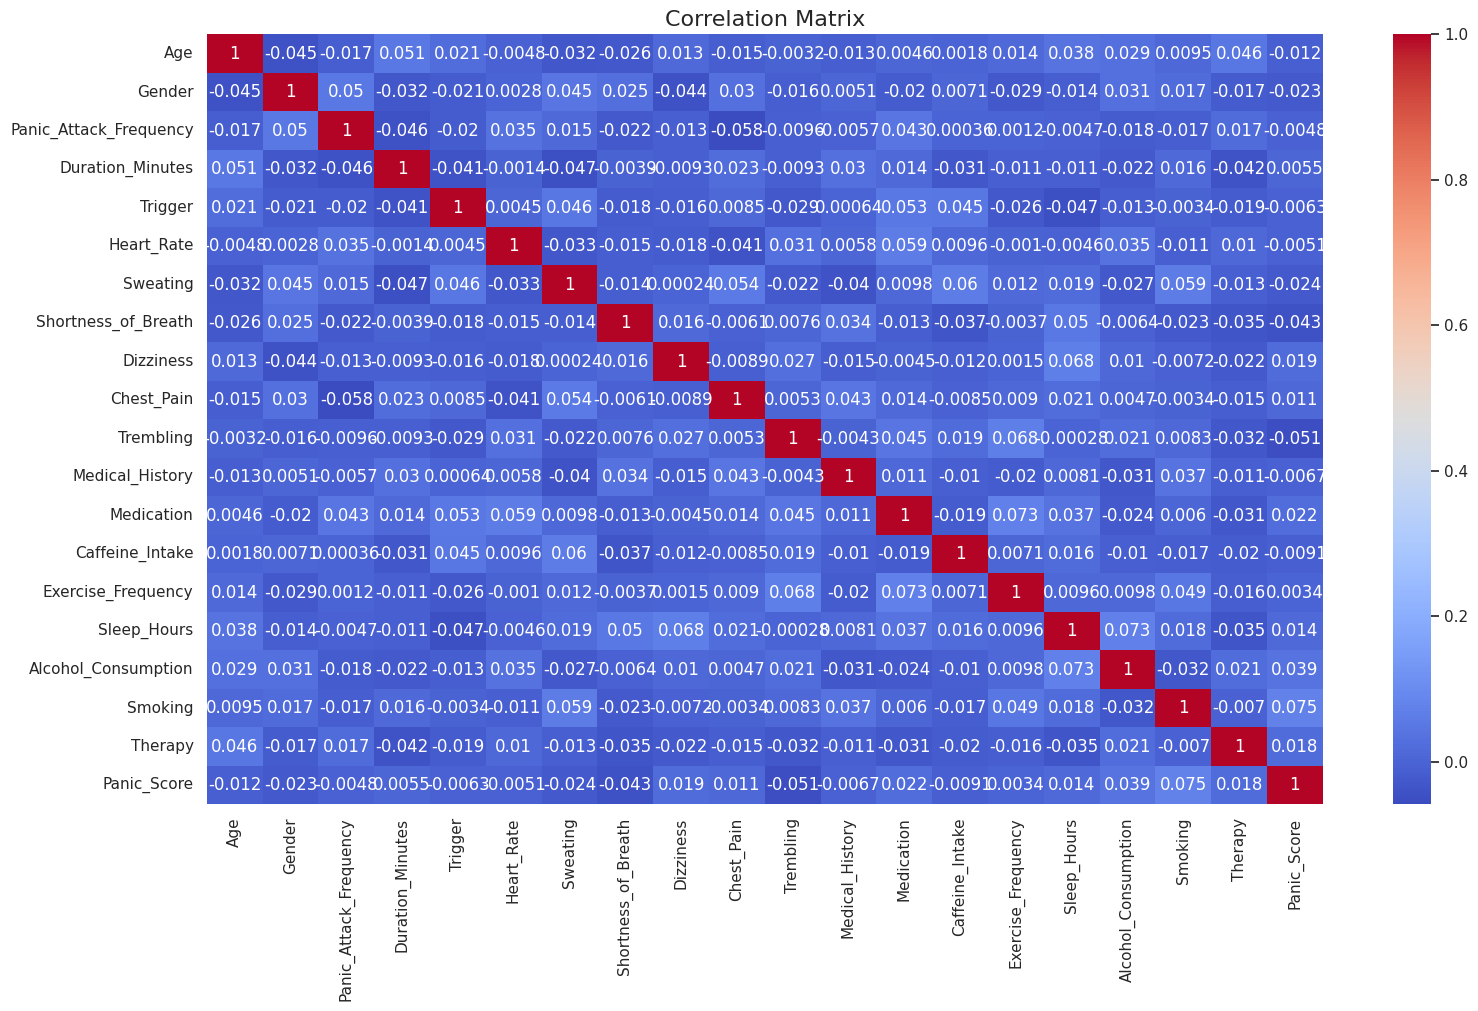

In [13]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

correlation_matrix = df.corr(method='pearson')

plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Comparison of Machine Learning Model Performance</div>

In [14]:
df['Panic_Score'].unique()

array([ 5,  7,  1,  8,  2, 10,  3,  6,  9,  4])

In [15]:
X = df.drop('Panic_Score', axis=1)
y = df['Panic_Score'] - 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=42),
    "SVM": SVC(kernel='rbf', C=1.0, probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42)
}

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    return accuracy, precision, recall, f1

In [16]:
results = []

for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.104167,0.111992,0.104167,0.101581
1,SVM,0.125000,0.144608,0.125000,0.114841
2,KNN,0.104167,0.205327,0.104167,0.096465
3,Decision Tree,0.091667,0.086890,0.091667,0.088412
4,Random Forest,0.095833,0.103423,0.095833,0.096099
5,XGBoost,0.112500,0.125015,0.112500,0.116669


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Comparison of Deep Learning Model Performance</div>

In [17]:
def plot_history(history, main_title):
    plt.figure(figsize=(12, 5))

    plt.suptitle(main_title, fontsize=20, fontweight='bold')

    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'], label='Training Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy', fontsize=16)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Loss', fontsize=16)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.92]) 
    plt.show()

early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=10,           
    restore_best_weights=True  
)

In [18]:
# NN Model 
simple_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)), 
    Dense(32, activation='relu'),  
    Dense(10, activation='softmax')  
])

simple_nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
simple_nn.summary()

history = simple_nn.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

test_loss, test_accuracy = simple_nn.evaluate(X_test, y_test, verbose=0)

print(f"Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,690 (14.41 KB)

 Trainable params: 3,690 (14.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.0864 - loss: 2.4504 - val_accuracy: 0.0750 - val_loss: 2.3485
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1186 - loss: 2.3051 - val_accuracy: 0.0875 - val_loss: 2.3419
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1286 - loss: 2.2797 - val_accuracy: 0.0875 - val_loss: 2.3465
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1987 - loss: 2.2197 - val_accuracy: 0.0875 - val_loss: 2.3528
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2134 - loss: 2.1952 - val_accuracy: 0.0875 - val_loss: 2.3533
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2465 - loss: 2.1695 - val_accuracy: 0.0792 - val_loss: 2.3651
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2740 - loss: 2.1226 - val_accuracy: 0.0875 - val_loss: 2.3715
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2456 - loss: 2.1219 - val_accuracy: 0.1000 - val_loss

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Accuracy: 0.0875


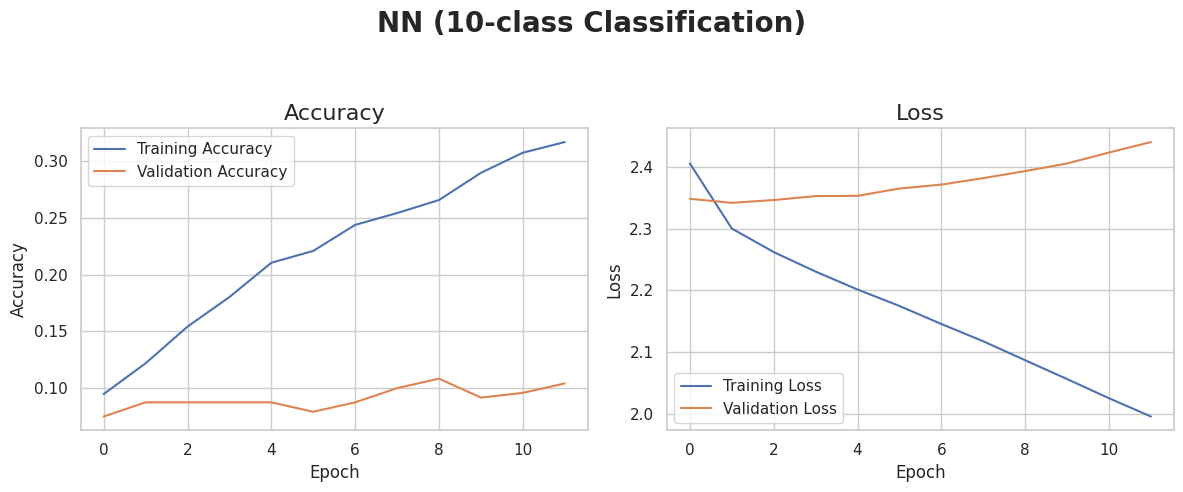

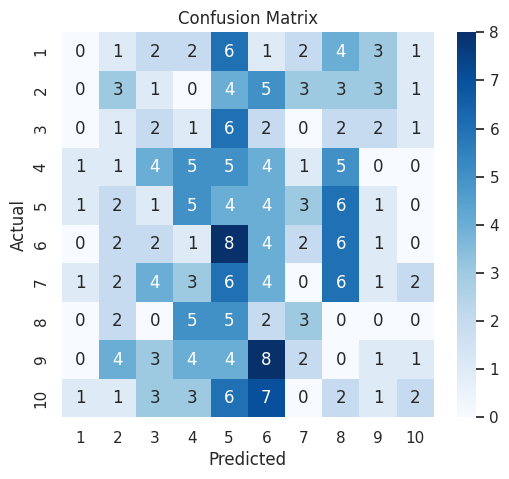

In [19]:
y_pred = simple_nn.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  

accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

plot_history(history.history, "NN (10-class Classification)")

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[f'{i+1}' for i in range(10)], 
            yticklabels=[f'{i+1}' for i in range(10)])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [20]:
# DNN Model 
dnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

dnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
dnn_model.summary()

history = dnn_model.fit(
    X_train, y_train,  
    epochs=50,
    batch_size=16,
    validation_data=(X_test, y_test),  
    callbacks=[early_stopping]
)

test_loss, test_accuracy = dnn_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,994 (54.66 KB)

 Trainable params: 13,610 (53.16 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.0648 - loss: 3.0663 - val_accuracy: 0.1000 - val_loss: 2.3338
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1160 - loss: 2.6268 - val_accuracy: 0.1167 - val_loss: 2.3444
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1335 - loss: 2.5015 - val_accuracy: 0.1083 - val_loss: 2.3528
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1251 - loss: 2.4440 - val_accuracy: 0.1375 - val_loss: 2.3628
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1457 - loss: 2.3562 - val_accuracy: 0.1125 - val_loss: 2.3824
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1528 - loss: 2.3408 - val_accuracy: 0.1250 - val_loss: 2.3819
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1627 - loss: 2.3000 - val_accuracy: 0.1292 - val_loss: 2.3846
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1589 - loss: 2.2856 - val_accuracy: 0.1375 - val_loss

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Accuracy: 0.1000


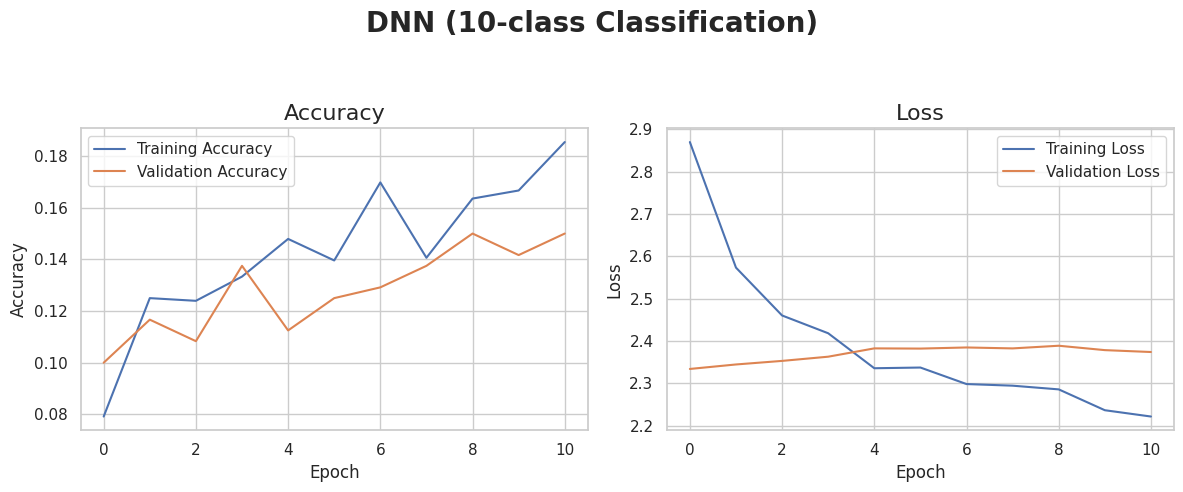

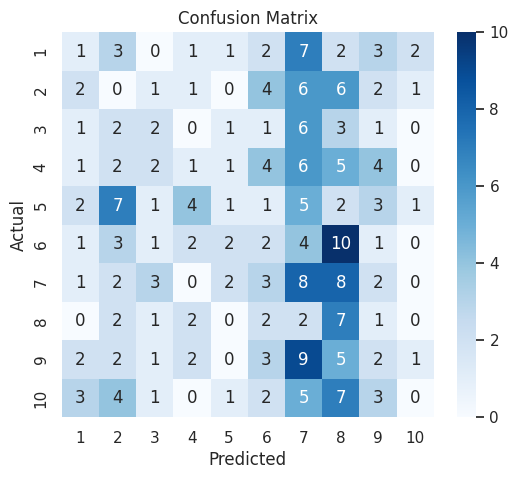

In [21]:
y_pred = dnn_model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  

accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

plot_history(history.history, "DNN (10-class Classification)")

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[f'{i+1}' for i in range(10)], 
            yticklabels=[f'{i+1}' for i in range(10)])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [22]:
# ANN Model
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')  
])

ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ann_model.summary()

history = ann_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

test_loss, test_accuracy = ann_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 128)                 │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,466 (44.79 KB)

 Trainable params: 11,466 (44.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.0794 - loss: 2.4487 - val_accuracy: 0.1208 - val_loss: 2.3004
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1188 - loss: 2.3015 - val_accuracy: 0.1208 - val_loss: 2.3119
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1513 - loss: 2.2795 - val_accuracy: 0.1042 - val_loss: 2.3105
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1767 - loss: 2.2358 - val_accuracy: 0.1167 - val_loss: 2.3169
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1600 - loss: 2.2349 - val_accuracy: 0.1125 - val_loss: 2.3233
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1814 - loss: 2.2096 - val_accuracy: 0.0917 - val_loss: 2.3281
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1939 - loss: 2.1877 - val_accuracy: 0.0875 - val_loss: 2.3357
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2399 - loss: 2.1806 - val_accuracy: 0.0917 - val_loss

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Accuracy: 0.1208


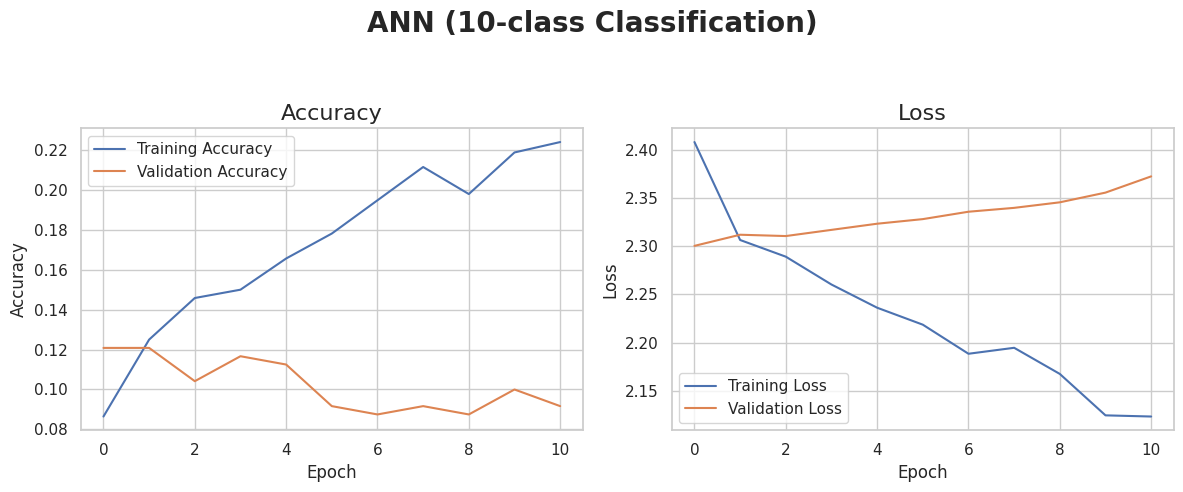

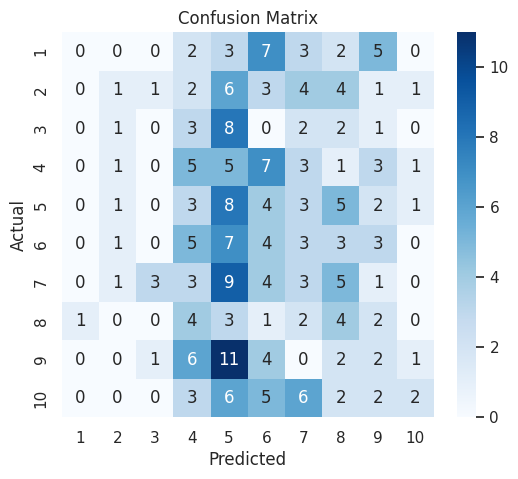

In [23]:
y_pred = ann_model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  

accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

plot_history(history.history, "ANN (10-class Classification)")

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[f'{i+1}' for i in range(10)], 
            yticklabels=[f'{i+1}' for i in range(10)])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [24]:
# MLP Model
mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')  
])

mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
mlp_model.summary()

history = mlp_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

test_loss, test_accuracy = mlp_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 128)                 │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,466 (44.79 KB)

 Trainable params: 11,466 (44.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1196 - loss: 2.4044 - val_accuracy: 0.1250 - val_loss: 2.3208
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1321 - loss: 2.3098 - val_accuracy: 0.1042 - val_loss: 2.3213
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1330 - loss: 2.2870 - val_accuracy: 0.1042 - val_loss: 2.3249
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1577 - loss: 2.2595 - val_accuracy: 0.1250 - val_loss: 2.3354
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1489 - loss: 2.2489 - val_accuracy: 0.1208 - val_loss: 2.3428
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1987 - loss: 2.2136 - val_accuracy: 0.0958 - val_loss: 2.3498
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1955 - loss: 2.2021 - val_accuracy: 0.1125 - val_loss: 2.3490
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2465 - loss: 2.1551 - val_accuracy: 0.1125 - val_loss:

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Accuracy: 0.1250


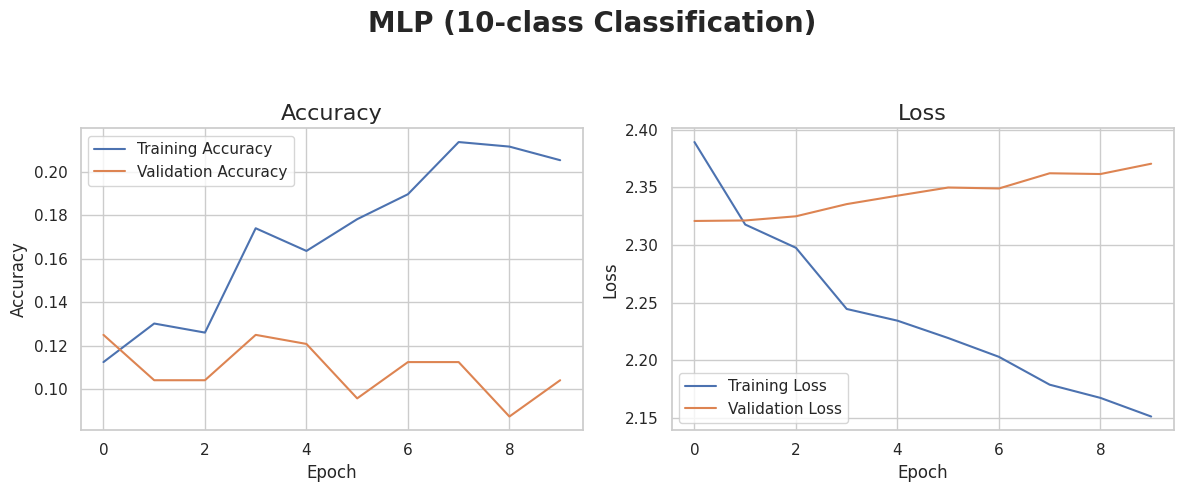

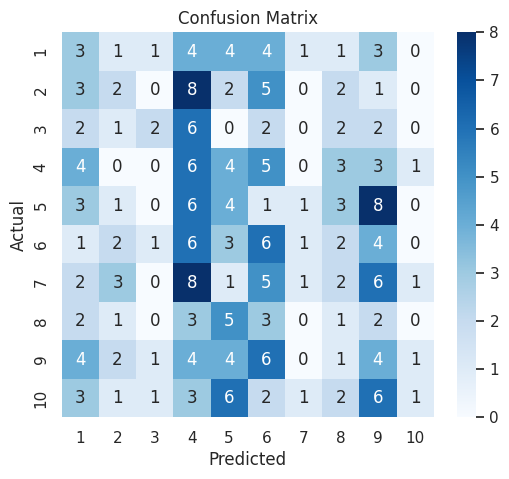

In [25]:
y_pred = mlp_model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  

accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

plot_history(history.history, "MLP (10-class Classification)")

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[f'{i+1}' for i in range(10)], 
            yticklabels=[f'{i+1}' for i in range(10)])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [26]:
X_train_np = X_train.values
X_test_np = X_test.values

X_train_reshaped = X_train_np.reshape((X_train_np.shape[0], X_train_np.shape[1], 1))  
X_test_reshaped = X_test_np.reshape((X_test_np.shape[0], X_test_np.shape[1], 1))

# CNN Model
cnn_model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  
])

cnn_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn_model.summary()

history = cnn_model.fit(
    X_train_reshaped, y_train,  
    epochs=50,
    batch_size=16,
    validation_data=(X_test_reshaped, y_test),  
    callbacks=[early_stopping]
)

test_loss, test_accuracy = cnn_model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 17, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 8, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,226 (67.29 KB)

 Trainable params: 17,226 (67.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.1058 - loss: 2.3295 - val_accuracy: 0.1000 - val_loss: 2.3148
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1402 - loss: 2.2744 - val_accuracy: 0.1083 - val_loss: 2.3147
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1533 - loss: 2.2545 - val_accuracy: 0.1167 - val_loss: 2.3150
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1886 - loss: 2.2237 - val_accuracy: 0.0958 - val_loss: 2.3238
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2024 - loss: 2.2064 - val_accuracy: 0.1125 - val_loss: 2.3251
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2344 - loss: 2.1734 - val_accuracy: 0.1125 - val_loss: 2.3295
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2250 - loss: 2.1666 - val_accuracy: 0.1083 - val_loss: 2.3541
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2473 - loss: 2.1230 - val_accuracy: 0.1083 - val_loss

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Accuracy: 0.1000


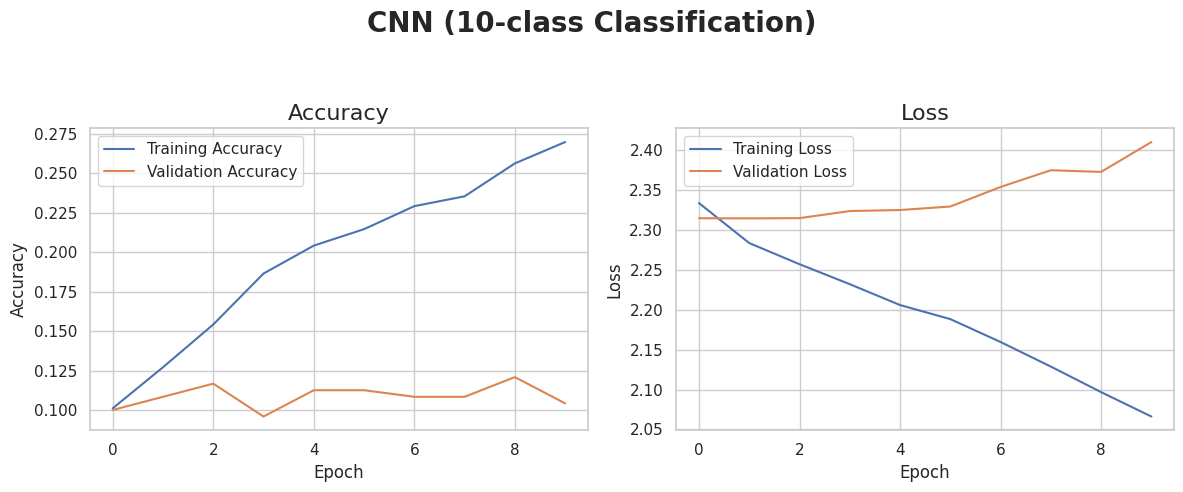

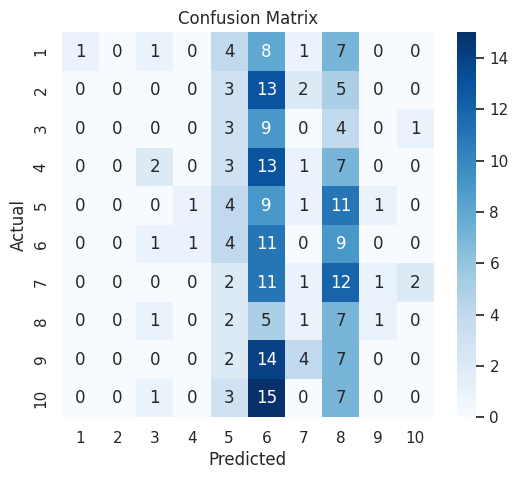

In [27]:
y_pred = cnn_model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  

accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

plot_history(history.history, "CNN (10-class Classification)")

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[f'{i+1}' for i in range(10)], 
            yticklabels=[f'{i+1}' for i in range(10)])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [28]:
def evaluate_model_on_test(model, X_test, y_test):
    if len(X_test.shape) == 2:  
        X_test_input = X_test
    else: 
        X_test_input = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    y_pred_prob = model.predict(X_test_input, verbose=0)

    y_pred = np.argmax(y_pred_prob, axis=1)  

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    return accuracy, precision, recall, f1

results_deep = []

models_dict = {
    "Simple NN": simple_nn,
    "DNN" : dnn_model,
    "ANN" : ann_model,
    "MLP": mlp_model,
    "CNN": cnn_model,
}

for model_name, model in models_dict.items():
    acc, precision, recall, f1 = evaluate_model_on_test(model, X_test, y_test)
    
    results_deep.append({
        "Model": model_name,
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })


results_df2 = pd.DataFrame(results_deep)
results_df2

,Model,Accuracy,Precision,Recall,F1-Score
0,Simple NN,0.087500,0.094889,0.087500,0.083069
1,DNN,0.100000,0.083215,0.100000,0.080188
2,ANN,0.120833,0.124049,0.120833,0.104053
3,MLP,0.125000,0.156343,0.125000,0.117055
4,CNN,0.100000,0.135210,0.100000,0.058251


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Conclusion</div>


Best Model (Machine Learning):
Model             SVM
Accuracy        0.125
Precision    0.144608
Recall          0.125
F1-Score     0.114841
Name: 1, dtype: object


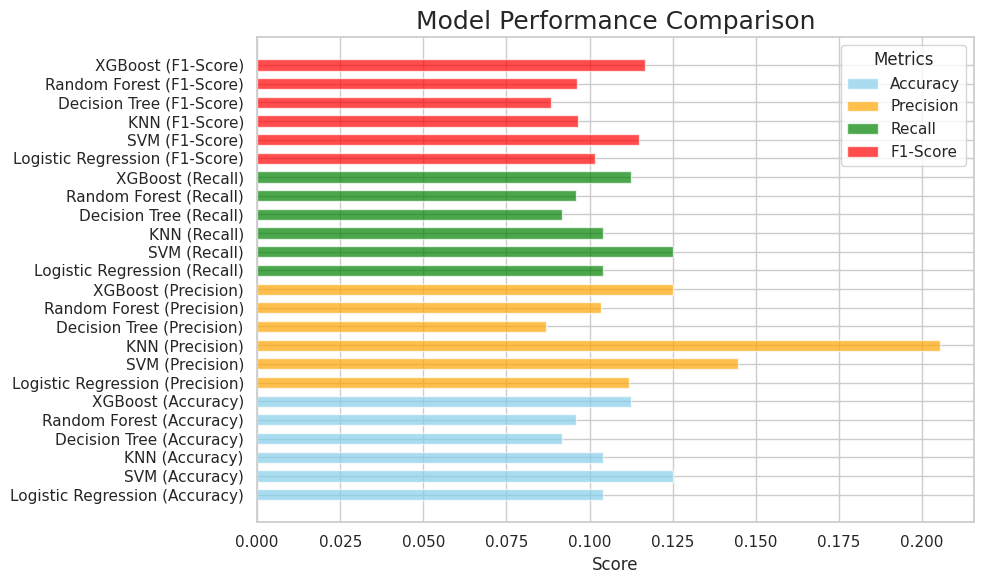


Optimal Model based on Accuracy: SVM with Accuracy = 0.1250


In [29]:
best_model = results_df.loc[results_df['Accuracy'].idxmax()]
print("\nBest Model (Machine Learning):")
print(best_model)

metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
colors = ["skyblue", "orange", "green", "red"]

fig, ax = plt.subplots(figsize=(10, 6))

offset = 0.3

for i, metric in enumerate(metrics):
    ax.barh(results_df['Model'] + f" ({metric})", results_df[metric], color=colors[i], alpha=0.7, label=metric, height=0.6)

ax.set_xlabel("Score", fontsize=12)
ax.set_title("Model Performance Comparison", fontsize=18)
ax.legend(title="Metrics")

plt.tight_layout()
plt.show()

print(f"\nOptimal Model based on Accuracy: {best_model['Model']} with Accuracy = {best_model['Accuracy']:.4f}")


Best Model (Deep Learning):
Model             DNN
Accuracy          0.1
Precision    0.083215
Recall            0.1
F1-Score     0.080188
Name: 1, dtype: object


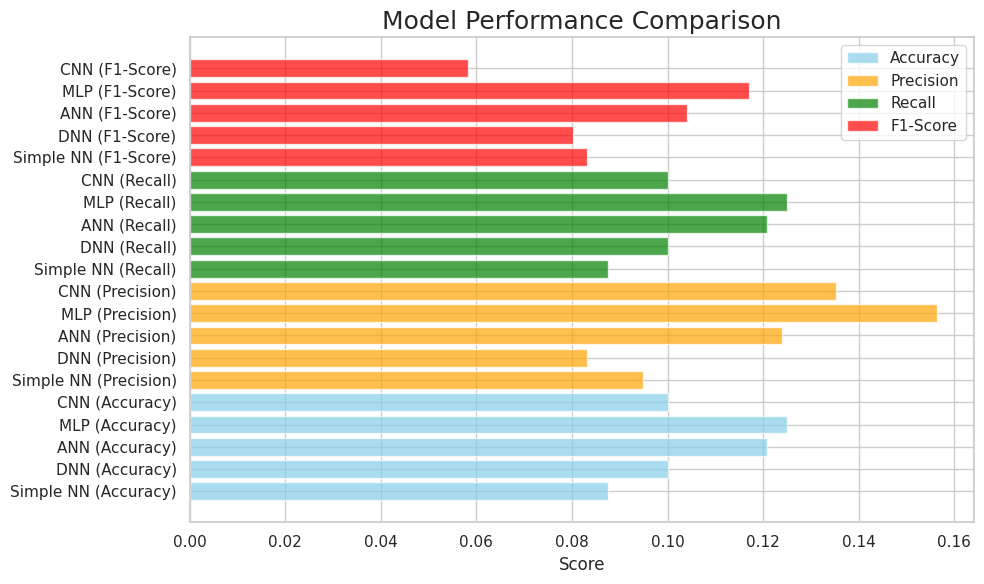


Optimal Model based on Accuracy: DNN with Accuracy = 0.1000


In [30]:
best_model2 = results_df2.loc[results_df['Accuracy'].idxmax()]
print("\nBest Model (Deep Learning):")
print(best_model2)

metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
colors = ["skyblue", "orange", "green", "red"]

fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    ax.barh(results_df2['Model'] + f" ({metric})", results_df2[metric], color=colors[i], alpha=0.7, label=metric)

ax.set_xlabel("Score", fontsize=12)
ax.set_title("Model Performance Comparison", fontsize=18)
ax.legend()
plt.tight_layout()
plt.show()

print(f"\nOptimal Model based on Accuracy: {best_model2['Model']} with Accuracy = {best_model2['Accuracy']:.4f}")

## Interpretation of results

### 1. Since the accuracy of all classification models is adjacent to 10%, they are not suitable for predicting Panic_Score.
### 2. If you look at the confusion matrix, each model has a prediction bias on a particular score.

<div style="display: inline-block; padding: 10px 15px; border-radius: 20px; background: linear-gradient(135deg, #ff7f50, #ff1493); box-shadow: 5px 5px 15px rgba(0, 0, 0, 0.3); font-size: 30px; font-family: 'Helvetica Neue', Arial, sans-serif; color: #ffffff; text-align: center; border: 2px solid #ffffff;">Thanks !</div><br><br>

<h3> If you have any questions, please feel free to ask me a question and use the code freely ! </h3><br>

<div style="text-align: center;">
    <a href="https://www.kaggle.com/lko9911" target="_blank" style="display: inline-block; background-color: #3a86ff; color: #fff; text-decoration: none; padding: 5px 10px; border-radius: 10px; margin: 15px; font-size: 25px;">Kaggle</a>
    <a href="https://github.com/lko9911" target="_blank" style="display: inline-block; background-color: #ff8c00; color: #ffffff; text-decoration: none; padding: 5px 20px; border-radius: 15px; margin: 15px; border: 2px solid #ff4500; font-size: 25px; font-family: 'Arial', sans-serif; font-weight: bold; transition: all 0.3s ease;">GitHub</a></div>